In [25]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import plotly.express as px

from scipy.stats import chi2_contingency

In [26]:
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64}) 

df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Chi-Square Test-

In [28]:
chisqt = pd.crosstab(df.InternetService, df.Area) 
print(chisqt)
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])

Area             Rural  Suburban  Urban
InternetService                        
DSL               1142      1170   1151
Fiber Optic       1477      1465   1466
None               708       711    710


In [29]:
stat, p, dof, expected = chi2_contingency(chisqt)

In [30]:
print ('The ChiSquare statistic is: ' + str(stat)) 
print ('The p-value is: ' + str(p))
print ('The degrees of freedom: '+ str(dof))

The ChiSquare statistic is: 0.34839005670538825
The p-value is: 0.9864800292335301
The degrees of freedom: 4


In [31]:
print('Internet service is independent of area. \n')

Internet service is independent of area. 



### Univariate Analysis

In [32]:
df[['MonthlyCharge', 'Bandwidth_GB_Year']].describe()

,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000
mean,172.624816,3392.341550
std,42.943094,2185.294852
min,79.978860,155.506715
25%,139.979239,1236.470827
50%,167.484700,3279.536903
75%,200.734725,5586.141370
max,290.160419,7158.981530


In [33]:
df[['Marital', 'Gender']].value_counts()

Marital        Gender   
Widowed        Female       1030
Divorced       Male         1024
               Female       1022
Separated      Female       1009
Never Married  Female       1006
Separated      Male          960
Married        Female        958
Widowed        Male          945
Married        Male          911
Never Married  Male          904
Widowed        Nonbinary      52
Divorced       Nonbinary      46
Never Married  Nonbinary      46
Separated      Nonbinary      45
Married        Nonbinary      42
dtype: int64

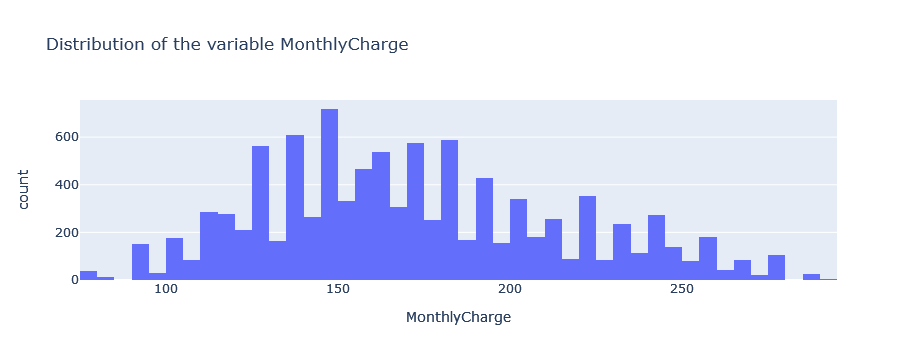

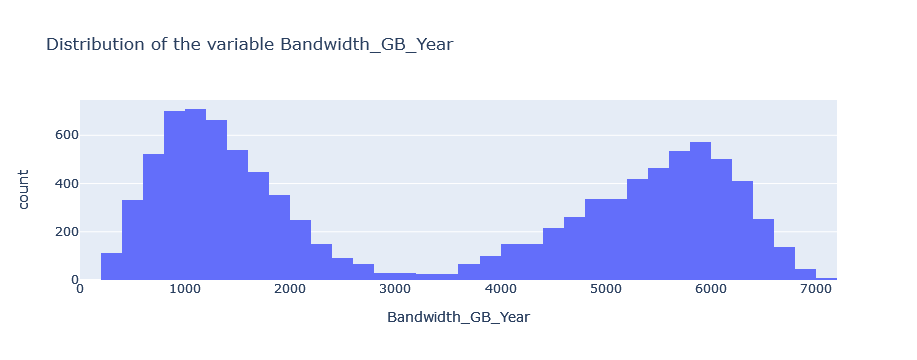

In [34]:
for i in df[['MonthlyCharge', 'Bandwidth_GB_Year']]:
    fig = px.histogram(df, x=i, title=f"Distribution of the variable {i}")
    fig.update_layout( xaxis={'categoryorder':'total descending'})
    fig.show()

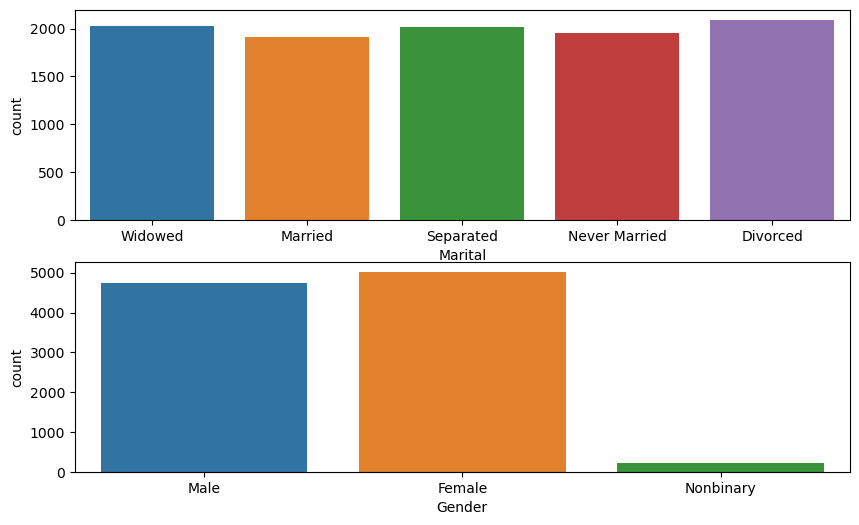

In [35]:
fig , ax = plt.subplots(2,figsize = (10,6))  
for i , subplots in zip (df[['Marital', 'Gender']], ax.flatten()):  
  sns.countplot(df[['Marital', 'Gender']][i],ax = subplots)
plt.show()

### Bivariate Analysis

In [36]:
df[['MonthlyCharge', 'Bandwidth_GB_Year']].corr()

,MonthlyCharge,Bandwidth_GB_Year
MonthlyCharge,1.000000,0.060406
Bandwidth_GB_Year,0.060406,1.000000


(0.0, 20000.0)

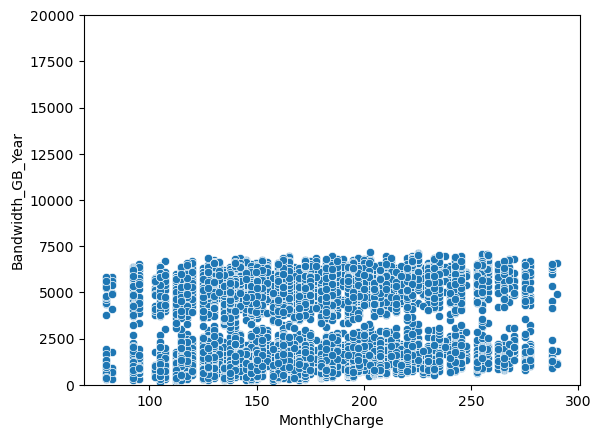

In [37]:
sns.scatterplot(df.MonthlyCharge, df.Bandwidth_GB_Year)
plt.ylim(0,20000)

In [38]:
pd.crosstab(df.Marital, df.Gender, margins=True)

Gender,Female,Male,Nonbinary,All
Marital,,,,
Divorced,1022,1024,46,2092
Married,958,911,42,1911
Never Married,1006,904,46,1956
Separated,1009,960,45,2014
Widowed,1030,945,52,2027
All,5025,4744,231,10000


In [39]:
all=pd.crosstab(df.Gender,df.Marital,margins=True)['All']
pd.crosstab(df.Gender,df.Marital).divide(all,axis=0).dropna()

Marital,Divorced,Married,Never Married,Separated,Widowed
Gender,,,,,
Female,0.203383,0.190647,0.200199,0.200796,0.204975
Male,0.215852,0.192032,0.190556,0.202361,0.199199
Nonbinary,0.199134,0.181818,0.199134,0.194805,0.225108


<AxesSubplot:xlabel='Marital', ylabel='count'>

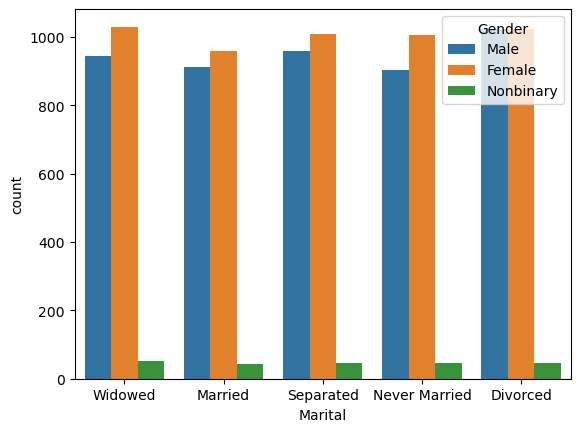

In [40]:
sns.countplot(data=df, x='Marital', hue='Gender')